<a href="https://colab.research.google.com/github/s20488/PJN/blob/main/Anastasiia_Ponkratova_Kwantyzacja_modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install huggingface_hub

## GGUF

## Pobranie modelu

Wczytaj model Llama-3.2-3B-Instruct używając funkcji `snapshot_download`

In [ ]:
from huggingface_hub import snapshot_download

model_path = snapshot_download(repo_id="nidum/Nidum-Llama-3.2-3B-Uncensored", local_dir="Llama3.2") #TODO

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Folder powinien wyglądac tak:

In [ ]:
!ls -lash Llama3.2

total 12G
4.0K drwxr-xr-x 3 root root 4.0K Dec 17 00:53 .
4.0K drwxr-xr-x 1 root root 4.0K Dec 17 00:53 ..
4.0K drwxr-xr-x 3 root root 4.0K Dec 17 00:53 .cache
4.0K -rw-r--r-- 1 root root  953 Dec 17 00:53 config.json
4.0K -rw-r--r-- 1 root root  184 Dec 17 00:53 generation_config.json
4.0K -rw-r--r-- 1 root root 1.6K Dec 17 00:53 .gitattributes
4.7G -rw-r--r-- 1 root root 4.7G Dec 17 00:54 model-00001-of-00003.safetensors
4.6G -rw-r--r-- 1 root root 4.6G Dec 17 00:54 model-00002-of-00003.safetensors
2.8G -rw-r--r-- 1 root root 2.8G Dec 17 00:54 model-00003-of-00003.safetensors
 24K -rw-r--r-- 1 root root  21K Dec 17 00:53 model.safetensors.index.json
 12K -rw-r--r-- 1 root root 8.9K Dec 17 00:53 README.md
4.0K -rw-r--r-- 1 root root  439 Dec 17 00:53 special_tokens_map.json
 56K -rw-r--r-- 1 root root  54K Dec 17 00:53 tokenizer_config.json
 17M -rw-r--r-- 1 root root  17M Dec 17 00:53 tokenizer.json


## Instalacja llama.cpp

Sklonuj repo llama cpp

In [ ]:
!git clone https://github.com/ggerganov/llama.cpp.git #TODO

Cloning into 'llama.cpp'...
remote: Enumerating objects: 39828, done.
remote: Counting objects: 100% (9862/9862), done.
remote: Compressing objects: 100% (709/709), done.
remote: Total 39828 (delta 9504), reused 9262 (delta 9153), pack-reused 29966 (from 1)
Receiving objects: 100% (39828/39828), 65.34 MiB | 22.05 MiB/s, done.
Resolving deltas: 100% (29030/29030), done.


Zainstaluj requirementsy z `requirements.txt`

In [ ]:
#TODO

In [ ]:
!pip install -r llama.cpp/requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu, https://download.pytorch.org/whl/cpu, https://download.pytorch.org/whl/cpu, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.8/186.8 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 2.2.2+cpu which is incompatible.
torchvision 0.20.1+cu121 requires torch==2.5.1, but you have torch 2.2.2+cpu which is incompatible.


## Kwantyzacja

Korzytsając z pliku `convert_hf_to_gguf.py` skwantyzuj model do Q8, wynikiem powinien być plik .gguf

In [ ]:
!python /content/llama.cpp/convert_hf_to_gguf.py -h

usage: convert_hf_to_gguf.py [-h] [--vocab-only] [--outfile OUTFILE]
                             [--outtype {f32,f16,bf16,q8_0,tq1_0,tq2_0,auto}] [--bigendian]
                             [--use-temp-file] [--no-lazy] [--model-name MODEL_NAME] [--verbose]
                             [--split-max-tensors SPLIT_MAX_TENSORS]
                             [--split-max-size SPLIT_MAX_SIZE] [--dry-run]
                             [--no-tensor-first-split] [--metadata METADATA]
                             model

Convert a huggingface model to a GGML compatible file

positional arguments:
  model                 directory containing model file

options:
  -h, --help            show this help message and exit
  --vocab-only          extract only the vocab
  --outfile OUTFILE     path to write to; default: based on input. {ftype} will be replaced by the
                        outtype.
  --outtype {f32,f16,bf16,q8_0,tq1_0,tq2_0,auto}
                        output format - use f32 for float3

In [ ]:
!python /content/llama.cpp/convert_hf_to_gguf.py \
    /content/Llama3.2/ \
    --outfile Llama3.2.gguf \
    --verbose
#TODO

INFO:hf-to-gguf:Loading model: Llama3.2
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:rope_freqs.weight,           torch.float32 --> F32, shape = {64}
INFO:hf-to-gguf:gguf: loading model weight map from 'model.safetensors.index.json'
INFO:hf-to-gguf:gguf: loading model part 'model-00001-of-00003.safetensors'
INFO:hf-to-gguf:token_embd.weight,           torch.float32 --> F16, shape = {3072, 128256}
INFO:hf-to-gguf:blk.0.attn_norm.weight,      torch.float32 --> F32, shape = {3072}
INFO:hf-to-gguf:blk.0.ffn_down.weight,       torch.float32 --> F16, shape = {8192, 3072}
INFO:hf-to-gguf:blk.0.ffn_gate.weight,       torch.float32 --> F16, shape = {3072, 8192}
INFO:hf-to-gguf:blk.0.ffn_up.weight,         torch.float32 --> F16, shape = {3072, 8192}
INFO:hf-to-gguf:blk.0.ffn_norm.weight,       torch.float32 --> F32, shape = {3072}
INFO:hf-to-gguf:blk.0.attn_k.weight,         torch.float32 --> F16, shape = {3072, 1024}
INF

## Upload na HF hub

Jeśli nie masz konta na Hugginface załóż je (pewnie i tak ci się przyda)

Stwórz nowy klucz z permision write i zaloguj się w notatniku

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Wrzuć skwantyzowany model na HF Hub

In [ ]:
from huggingface_hub import HfApi
api = HfApi()

model_id = "s20488/Llama-3.2-3B-Instruct-gguf"
api.create_repo(model_id, exist_ok=True, repo_type="model")
api.upload_file(
    path_or_fileobj="Llama3.2.gguf",
    path_in_repo="Llama3.2.gguf",
    repo_id=model_id,
)

Llama3.2.gguf:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/s20488/Llama-3.2-3B-Instruct-gguf/commit/4b03eeac08c2d114ee432fabec4a34abf895d80b', commit_message='Upload Llama3.2.gguf with huggingface_hub', commit_description='', oid='4b03eeac08c2d114ee432fabec4a34abf895d80b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/s20488/Llama-3.2-3B-Instruct-gguf', endpoint='https://huggingface.co', repo_type='model', repo_id='s20488/Llama-3.2-3B-Instruct-gguf'), pr_revision=None, pr_num=None)

Repo powinno  np. tak:
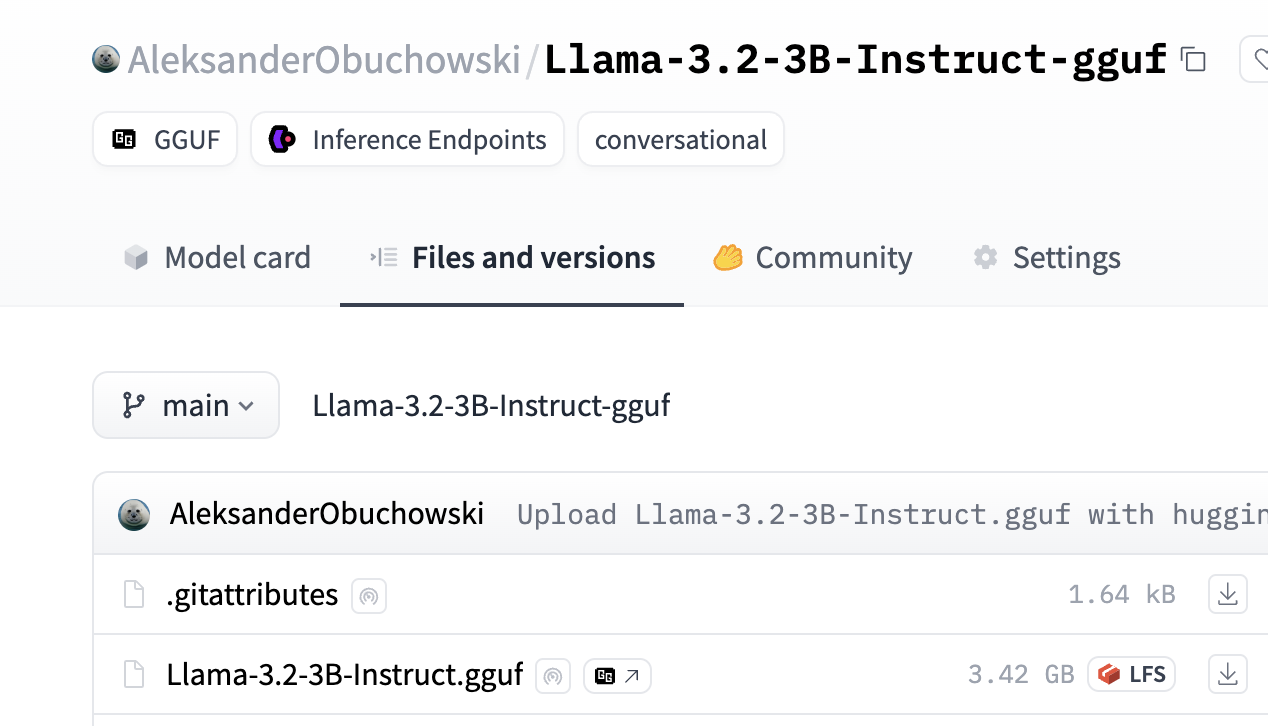

Staw link do swojego repo

In [ ]:
!https://huggingface.co/s20488/Llama-3.2-3B-Instruct-gguf # TODO: Wstaw link do repo

## Predykcja

In [ ]:
!pip install llama-cpp-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 MB 9.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.8 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.5-cp310-cp310-linux_x86_64.whl size=3510121 sha256=dc3c6d298c6b25b1110dadb56f45d8bf44676635b1ec2873ba5ffacff4586896
  Stored in directory: /root/.cache/pip/wheels/7e/ae/c3/34a10eba5fc4e75df17818312b6a1ee29eb90f13a12c524714
Successfully built llama-cpp-python


Załaduj model

In [ ]:
from llama_cpp import Llama
model_path = "/content/Llama3.2.gguf"
llm = Llama(model_path=model_path)

llama_model_loader: loaded meta data with 33 key-value pairs and 255 tensors from /content/Llama3.2.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama3.2
llama_model_loader: - kv   3:                         general.size_label str              = 3.2B
llama_model_loader: - kv   4:                            general.license str              = apache-2.0
llama_model_loader: - kv   5:                   general.base_model.count u32              = 1
llama_model_loader: - kv   6:                  general.base_model.0.name str              = Llama 3.2 3B Instruct
llama_model_loader: - kv   7:          general.base_model.0.organ

Test modelu

In [ ]:
generation_kwargs = {
    "max_tokens":200,
    "echo":False,
    "top_k":1
}

prompt = "Which country hosted 2018 fifa world cup?"
res = llm(prompt, **generation_kwargs)
res

llama_perf_context_print:        load time =    4027.85 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    12 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   199 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  135224.60 ms /   211 tokens


{'id': 'cmpl-4667831e-c3aa-4970-b3f3-5fbd747634e5',
 'object': 'text_completion',
 'created': 1734401248,
 'model': '/content/Llama3.2.gguf',
 'choices': [{'text': ' Russia hosted the 2018 FIFA World Cup. \n\nThe 2018 FIFA World Cup was the 21st edition of the FIFA World Cup, an international football tournament held every four years. It took place from June 14 to July 15, 2018, in Russia. The tournament featured 32 national teams, with the host country, Russia, being one of the teams. The final match was between France and Croatia, with France winning the tournament by defeating Croatia 4-2 in the final. \n\nThe 2018 FIFA World Cup was a major international sporting event that brought together athletes from all over the world to compete for the coveted trophy. It was the first time that Russia had hosted the tournament, and it was also the first time that a European country had hosted the World Cup since 1966. The event was a huge success, with high attendance figures and widespread m

## LM Studio

TODO: Załaduj swój model lokalnie korzystając z LM Studio i wstaw screenshot że działa

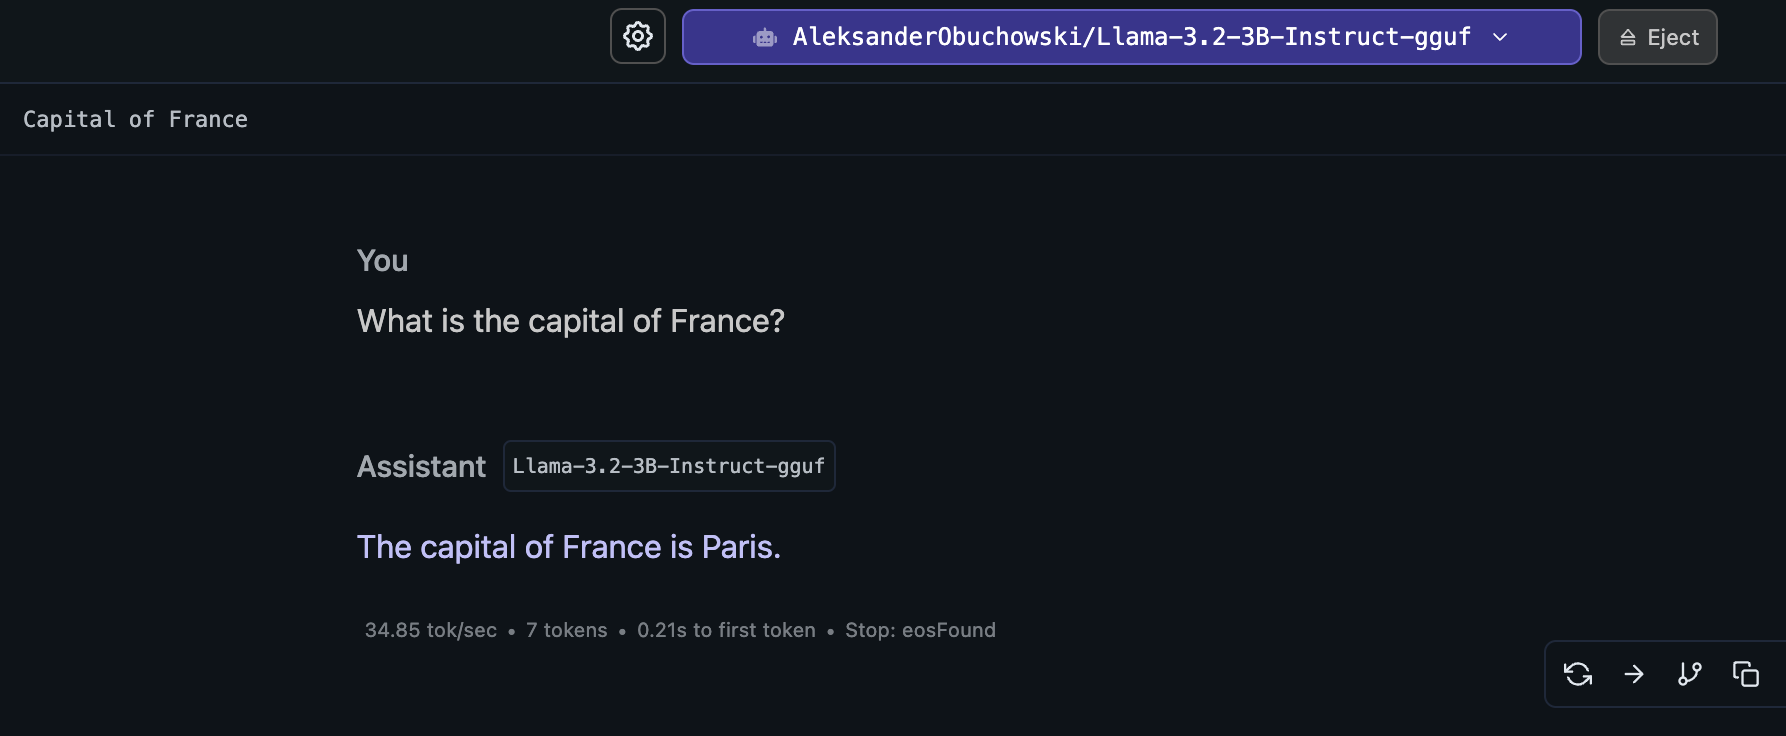

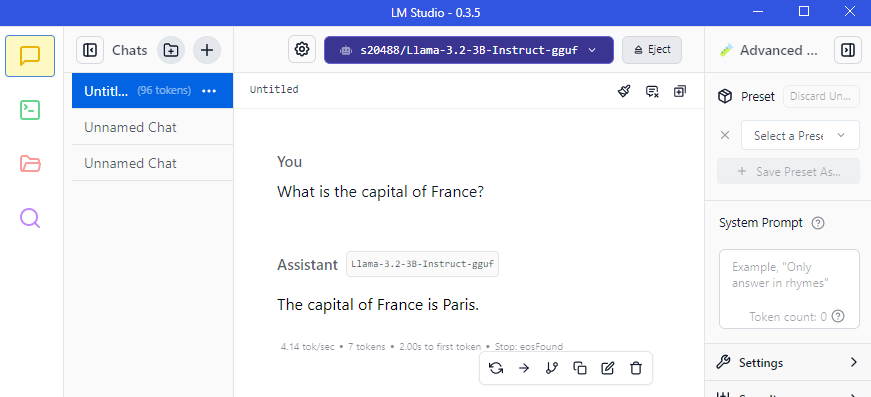

# GPTQ

Zmień środowisko na GPU!

In [ ]:
!pip install -U torch==2.3.1
!pip install torchvision==0.17.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!pip install -q -U transformers peft accelerate optimum
!pip install datasets==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install auto-gptq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 29.8 MB/s eta 0:00:00


## Kwantyzacja

Skwantyzuj model korzystając z GPTQ https://huggingface.co/docs/transformers/en/quantization/gptq

* model: opt-125m
* dataset: wikitext2
* 4bity

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, GPTQConfig
import torch

model_id = "facebook/opt-125m"
dataset = "wikitext2"

gptq_config = GPTQConfig(
    bits=4,
    dataset=dataset,
    group_size=128,
    desc_act=False
)

tokenizer = AutoTokenizer.from_pretrained(model_id)

quant_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    quantization_config=gptq_config
)

Quantizing model.decoder.layers blocks :   0%|          | 0/12 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

Quantizing layers inside the block:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:5055: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(


## Testy modelu

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_id)

text = "Hello my name is"
inputs = tokenizer(text, return_tensors="pt").to(0)

out = quant_model.generate(**inputs)
print(tokenizer.decode(out[0], skip_special_tokens=True))

Hello my name is John and I am a student at the University of California at Berkeley. I am a student at the
